In [178]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [181]:
# Lee datos en un DataFrame
AccidentesAviones = pd.read_csv('datasets/AccidentesAviones.csv')

### Vemos las columnas, sus nombres y datos que contienen

In [ ]:
AccidentesAviones.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [ ]:
# Cambia nombre de columnas para que tengan mismo formato
AccidentesAviones = AccidentesAviones.rename(columns={'HORA declarada': 'hora'})
AccidentesAviones = AccidentesAviones.rename(columns={'OperadOR': 'operador'})
AccidentesAviones = AccidentesAviones.rename(columns={'flight_no': 'nro_vuelo'})
AccidentesAviones = AccidentesAviones.rename(columns={'route': 'tipo_vuelo'})
AccidentesAviones = AccidentesAviones.rename(columns={'ac_type': 'tipo_vehiculo'})
AccidentesAviones = AccidentesAviones.rename(columns={'registration': 'matricula'})
AccidentesAviones = AccidentesAviones.rename(columns={'cn_ln': 'serie_id'})
AccidentesAviones = AccidentesAviones.rename(columns={'all_aboard': 'todos_a_bordo'})
AccidentesAviones = AccidentesAviones.rename(columns={'PASAJEROS A BORDO': 'pasajeros_a_bordo'})
AccidentesAviones = AccidentesAviones.rename(columns={'crew_aboard': 'tripulacion_a_bordo'})
AccidentesAviones = AccidentesAviones.rename(columns={'cantidad de fallecidos': 'cantidad_fallecidos'})
AccidentesAviones = AccidentesAviones.rename(columns={'passenger_fatalities': 'pasajeros_fallecidos'})
AccidentesAviones = AccidentesAviones.rename(columns={'crew_fatalities': 'tripulacion_fallecida'})
AccidentesAviones = AccidentesAviones.rename(columns={'ground': 'fallecidos_tierra'})
AccidentesAviones = AccidentesAviones.rename(columns={'summary': 'descripcion'})

Se identifico una necesidad: la estandarización de los nombres de las columnas en el mismo formato e idioma. Este proceso de normalización es fundamental para asegurar la coherencia y comprensión de nuestros datos. Además, nos permitirá acompañar los hallazgos con gráficos e información más precisa y efectiva.

#### Observemos información crucial sobre las columnas y el tipo de datos que contienen, así como la cantidad de registros no nulos presentes

In [ ]:
AccidentesAviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             5008 non-null   int64 
 1   fecha                  5008 non-null   object
 2   hora                   5008 non-null   object
 3   Ruta                   5008 non-null   object
 4   operador               5008 non-null   object
 5   nro_vuelo              5008 non-null   object
 6   tipo_vuelo             5007 non-null   object
 7   tipo_vehiculo          5008 non-null   object
 8   matricula              5008 non-null   object
 9   serie_id               5008 non-null   object
 10  todos_a_bordo          5008 non-null   object
 11  pasajeros_a_bordo      5008 non-null   object
 12  tripulacion_a_bordo    5008 non-null   object
 13  cantidad_fallecidos    5008 non-null   object
 14  pasajeros_fallecidos   5008 non-null   object
 15  tripulacion_fallecida

Como se puede observar, algunas de las columnas presentan un tipo de dato diferente al contenido que albergan. Por esta razón, se llevará a cabo una modificación con el fin de adecuarlos al formato correcto, preparándolos para su posterior analisis.

In [ ]:
# La función lambda verifica que la cadena tenga 4 caracteres (como "1718") y la transforma a "17:18"
AccidentesAviones['hora'] = AccidentesAviones['hora'].apply(lambda x: x[:2] + ':' + x[2:] if len(x) == 4 else x)

# Especifica las columnas en las que deseas reemplazar los '?' por NaN
columnas_especificas_nan = ['hora', 'fecha', 'nro_vuelo', 'todos_a_bordo', 'pasajeros_a_bordo', 'tripulacion_a_bordo', 'cantidad_fallecidos', 'pasajeros_fallecidos', 'tripulacion_fallecida', 'fallecidos_tierra']
columnas_especificas_no_especificado = ['Ruta', 'operador', 'tipo_vuelo', 'tipo_vehiculo', 'matricula', 'serie_id', 'descripcion']

# Reemplaza los '?' por NaN solo en las columnas especificadas
AccidentesAviones[columnas_especificas_nan] = AccidentesAviones[columnas_especificas_nan].replace('?', np.nan)

# Reemplaza los '?' por NaN solo en las columnas especificadas
AccidentesAviones[columnas_especificas_no_especificado] = AccidentesAviones[columnas_especificas_no_especificado].replace('?', 'No especificado')

In [ ]:
# Convierte la columna 'fecha' al formato de fecha de Pandas
AccidentesAviones['fecha'] = pd.to_datetime(AccidentesAviones['fecha'], format='%B %d, %Y', errors='coerce').dt.strftime('%Y-%m-%d')
AccidentesAviones['fecha'] = pd.to_datetime(AccidentesAviones['fecha'])

In [ ]:
# Convierte la columna a tipo float64
AccidentesAviones['nro_vuelo'] = AccidentesAviones['nro_vuelo'].apply(pd.to_numeric, errors='coerce')
# Reemplaza los valores NaN por 0
AccidentesAviones['todos_a_bordo'] = AccidentesAviones['todos_a_bordo'].fillna(0)
AccidentesAviones['pasajeros_a_bordo'] = AccidentesAviones['pasajeros_a_bordo'].fillna(0)
AccidentesAviones['tripulacion_a_bordo'] = AccidentesAviones['tripulacion_a_bordo'].fillna(0)
AccidentesAviones['cantidad_fallecidos'] = AccidentesAviones['cantidad_fallecidos'].fillna(0)
AccidentesAviones['pasajeros_fallecidos'] = AccidentesAviones['pasajeros_fallecidos'].fillna(0)
AccidentesAviones['tripulacion_fallecida'] = AccidentesAviones['tripulacion_fallecida'].fillna(0)
AccidentesAviones['fallecidos_tierra'] = AccidentesAviones['fallecidos_tierra'].fillna(0)
# Convierte la columna a tipo int64
AccidentesAviones['todos_a_bordo'] = AccidentesAviones['todos_a_bordo'].astype('int64')
AccidentesAviones['pasajeros_a_bordo'] = AccidentesAviones['pasajeros_a_bordo'].astype('int64')
AccidentesAviones['tripulacion_a_bordo'] = AccidentesAviones['tripulacion_a_bordo'].astype('int64')
AccidentesAviones['cantidad_fallecidos'] = AccidentesAviones['cantidad_fallecidos'].astype('int64')
AccidentesAviones['pasajeros_fallecidos'] = AccidentesAviones['pasajeros_fallecidos'].astype('int64')
AccidentesAviones['tripulacion_fallecida'] = AccidentesAviones['tripulacion_fallecida'].astype('int64')
AccidentesAviones['fallecidos_tierra'] = AccidentesAviones['fallecidos_tierra'].astype('int64')

In [ ]:
AccidentesAviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             5008 non-null   int64         
 1   fecha                  5008 non-null   datetime64[ns]
 2   hora                   3504 non-null   object        
 3   Ruta                   5008 non-null   object        
 4   operador               5008 non-null   object        
 5   nro_vuelo              1156 non-null   float64       
 6   tipo_vuelo             5007 non-null   object        
 7   tipo_vehiculo          5008 non-null   object        
 8   matricula              5008 non-null   object        
 9   serie_id               5008 non-null   object        
 10  todos_a_bordo          5008 non-null   int64         
 11  pasajeros_a_bordo      5008 non-null   int64         
 12  tripulacion_a_bordo    5008 non-null   int64         
 13  can

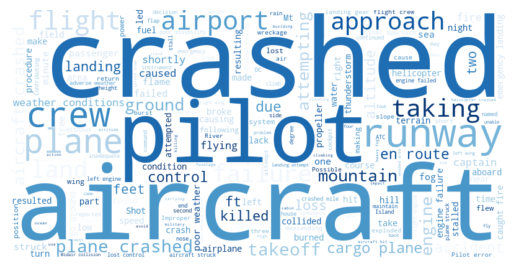

In [ ]:
# Supongamos que tienes una columna llamada 'texto' que contiene el texto del que quieres crear la nube de palabras.
nube_descripcion = AccidentesAviones['descripcion']

# Combinar todos los textos en una sola cadena (esto es necesario para generar la nube de palabras)
texto_descripcion = ' '.join(nube_descripcion)

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(texto_descripcion)

# Mostrar la nube de palabras utilizando Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

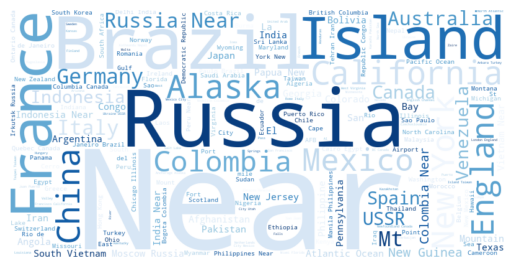

In [ ]:
# Supongamos que tienes una columna llamada 'texto' que contiene el texto del que quieres crear la nube de palabras.
nube_ruta = AccidentesAviones['Ruta']

# Combinar todos los textos en una sola cadena (esto es necesario para generar la nube de palabras)
texto_ruta = ' '.join(nube_ruta)

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(texto_ruta)

# Mostrar la nube de palabras utilizando Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Relacion entre Variables Numericas**

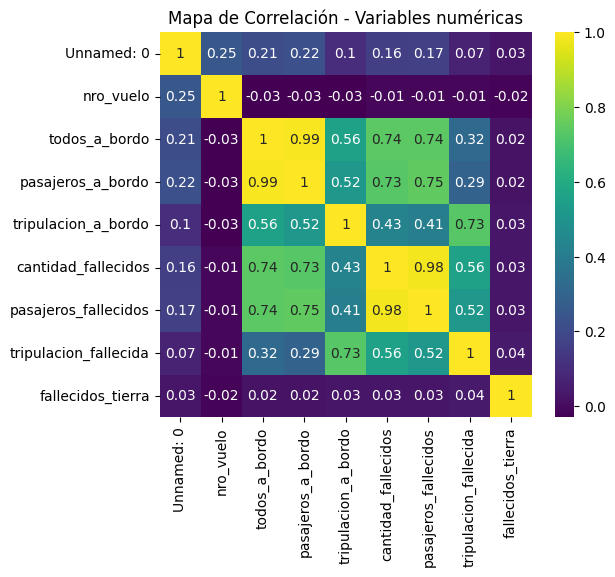

In [ ]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = AccidentesAviones.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

AL examinar el cruce de las variables numéricas en la matriz, se observaron relaciones positivas y significativas entre las siguientes características: `todos_a_bordo`, `pasajeros_a_bordo`, `tripulación_a_bordo`, `cantidad_fallecidos`, `pasajeros_fallecidos` y `tripulación_fallecidos`. Por otro lado, se registraron correlaciones negativas en las demás combinaciones de variables, lo cual era una expectativa razonable. Este resultado confirma que, por ejemplo, la cantidad de `pasajeros_a_bordo` no guarda correlación con el `nro_vuelo`, como se anticipaba.

## **Accidentes en función del tiempo**

### Distribución por hora de cantidad de accidentes

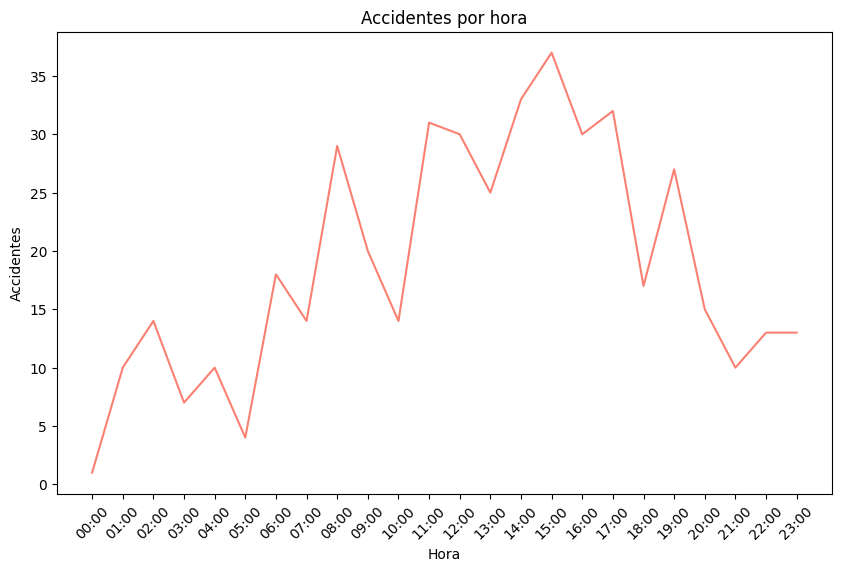

In [ ]:
# Elimina los valores NaN de la columna 'horas'
hs_sin_nan = AccidentesAviones.dropna(subset=['hora'])

# Define una lista de todas las horas en el rango de 00:00 a 23:59
todas_las_horas = [f'{str(i).zfill(2)}:00' for i in range(24)]

# Cuenta las ocurrencias de cada hora y llena con ceros las horas faltantes
counts = hs_sin_nan['hora'].value_counts().reindex(todas_las_horas, fill_value=0)

# Crea un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, color='salmon')
plt.xlabel('Hora')
plt.ylabel('Accidentes')
plt.title('Accidentes por hora')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para una mejor legibilidad

plt.show()

* En el gráfico que representa la relación entre el tiempo y la cantidad de accidentes, se destaca un patrón interesante. Las horas con mayor incidencia de accidentes son las 15, 17 y 11 en ese orden. Esto podría indicar que estos momentos coinciden con las horas pico, en las cuales las personas suelen tomar vuelos o experimentar una mayor prisa debido a compromisos laborales o personales, como la hora del almuerzo o la vuelta del trabajo.
* Por otro lado, es importante notar que las horas con menos accidentes se presentan a las 00:00 y a las 5:00 AM. Esto es completamente esperable, ya que a esas horas se registra una disminución significativa en el tráfico aéreo, lo que naturalmente reduce el riesgo de accidentes.

### Distribución por día de cantidad de accidentes

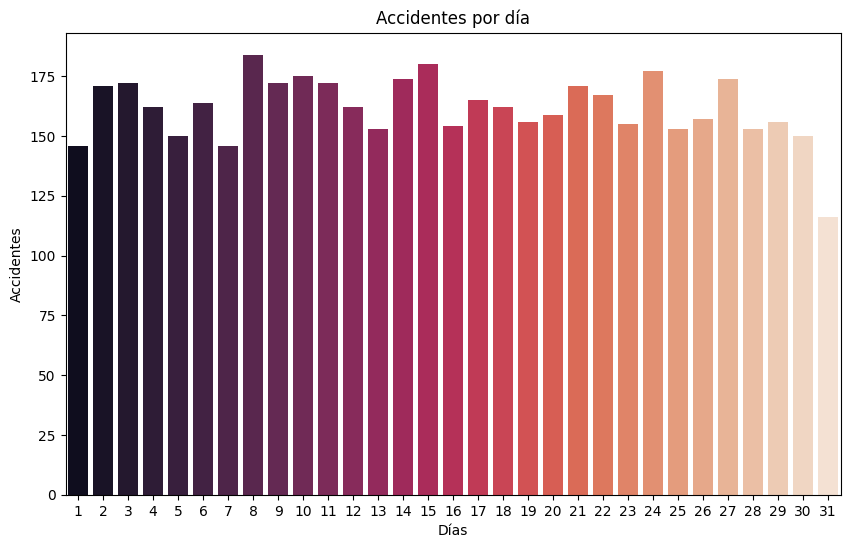

In [ ]:
# Cuenta la frecuencia de cada día en la columna
day_counts = AccidentesAviones['fecha'].dt.day.value_counts().sort_index()

# Nombres de los día en formato corto
dias = list(range(1,32))

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=dias, y=day_counts, palette="rocket")
ax.set_title('Accidentes por día')
ax.set_xlabel('Días')
ax.set_ylabel('Accidentes')

plt.show()

* Cuando observamos la cantidad de accidentes en función de los días (números), notamos que las variaciones son más generales y menos pronunciadas en comparación con las diferencias observadas en las horas del día. Un enfoque más detallado podría considerar analizar los accidentes según el día de la semana, lo que podría revelar patrones más específicos.
* Sin embargo, un hallazgo importante que debemos resaltar es la disminución notable en la cantidad de accidentes en la fecha 31. Esto podría explicarse, al menos en parte, por el hecho de que al tratarse del último día del mes, es menos común que las personas viajen con la misma frecuencia que en otros momentos del mes.

### Distribución por mes de cantidad de accidentes

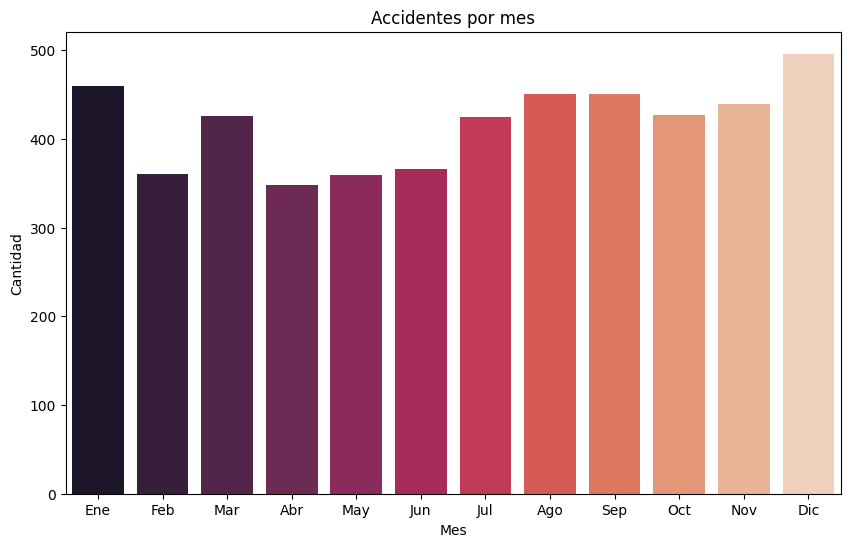

In [ ]:
# Cuenta la frecuencia de cada mes en la columna
month_counts = AccidentesAviones['fecha'].dt.month.value_counts().sort_index()

# Nombres de los meses en formato corto
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=meses, y=month_counts, palette="rocket")
ax.set_title('Accidentes por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')

plt.show()

Al observar la cantidad de accidentes aéreos por mes, se destaca un patrón interesante.
* El mes con la mayor cantidad de accidentes es diciembre, lo cual podría estar relacionado con la temporada de festividades y desplazamientos masivos de personas.
* Por otro lado, se observa una estabilidad en la cantidad de accidentes durante los meses de julio a noviembre, con variaciones mínimas.
* En contraste, entre enero y junio, aunque hay dos meses con un notable aumento en la cantidad de accidentes, el resto de los meses mantienen niveles inferiores en comparación con los meses mencionados anteriormente.

### Distribución por año de cantidad de accidentes

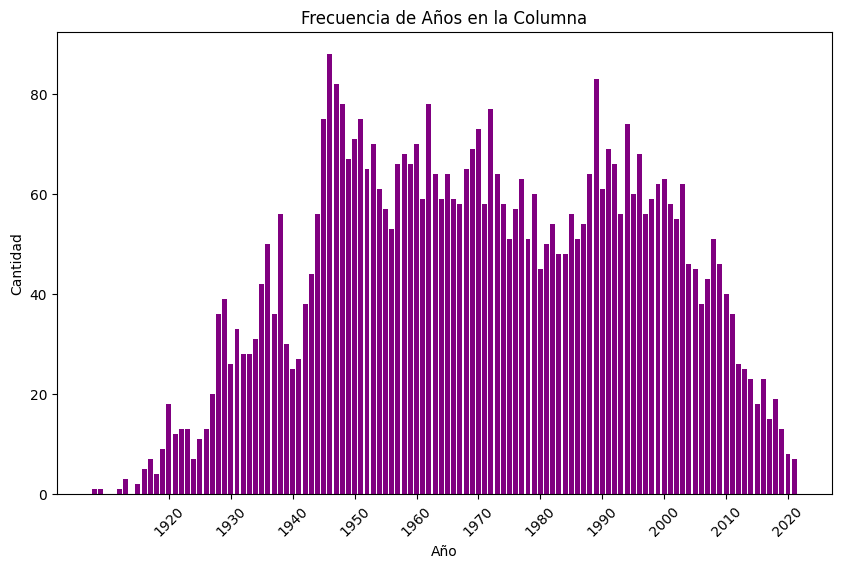

In [ ]:
# Cuenta la frecuencia de cada año en la columna
year_counts = AccidentesAviones['fecha'].dt.year.value_counts().sort_index()

# Extrae los años presentes en tu DataFrame
años_presentes = list(year_counts.index)

# Filtra los años para mostrar solo cada 10 años
años_cada_10 = [año for año in años_presentes if año % 10 == 0]

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(años_presentes, year_counts, color='purple')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Frecuencia de Años en la Columna')
plt.xticks(años_cada_10, rotation=45)  # Rota las etiquetas del eje X para una mejor legibilidad

plt.show()

Al observar el gráfico que muestra la cantidad de accidentes a lo largo de los años, se aprecia de inmediato que se producen bruscos aumentos en la cantidad de accidentes en ciertos momentos.
* Los dos casos más destacados son los años 1946 y 1989, que muestran un incremento significativo en la incidencia de accidentes.
* Además, se identifica una marcada disminución en el año 2020. Esto se atribuye en gran medida a la pandemia mundial de COVID-19, que tuvo un impacto sustancial en la industria de la aviación, con restricciones de viaje y una menor actividad aérea.

### ***Conclusiones***
* Estas observaciones resaltan la importancia de considerar los factores de tiempo, así como sus patrones, en la gestión de la seguridad y la prevención de accidentes en la aviación.
* Estos análisis sugieren que los factores estacionales y de comportamiento humano desempeñan un papel crucial en la seguridad aérea.
* Estos datos ilustran cómo eventos históricos y factores externos pueden influir drásticamente en la seguridad de la aviación a lo largo de los años.


## **Accidentes en función de tipo de vehículo**

### Cantidad de accidentes por tipo de vehiculo

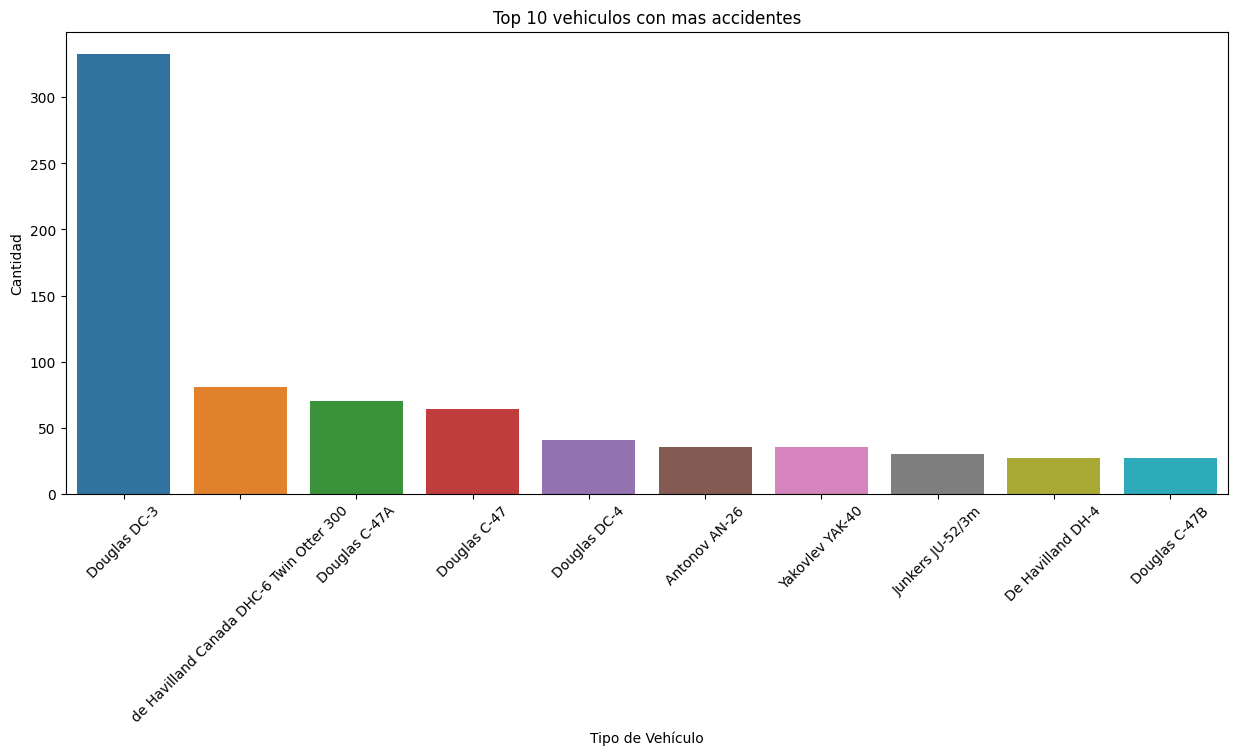

In [ ]:
# Obtener los 10 vehículos que más aparecen excluyendo NaN
top_10_vehiculos = AccidentesAviones['tipo_vehiculo'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_10_vehiculos.index, y=top_10_vehiculos.values, palette="tab10")
ax.set_title('Top 10 vehiculos con mas accidentes')
ax.set_xlabel('Tipo de Vehículo')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=45)

plt.show()


Al examinar la cantidad de accidentes según el tipo de vehículo aéreo, surge un patrón interesante.
* Se destaca que la empresa Douglas, que operó en una amplia variedad de tareas tanto civiles como militares, registra la mayor cantidad de accidentes en comparación con otras empresas.

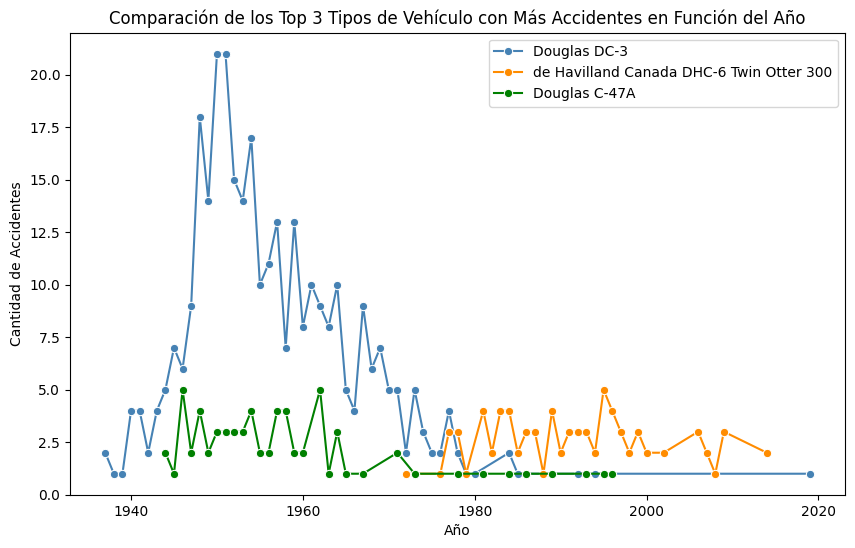

In [ ]:
# Convierte 'fecha' en formato datetime.
AccidentesAviones['fecha'] = pd.to_datetime(AccidentesAviones['fecha'])

# Agregar una columna 'año' para extraer el año de la fecha
AccidentesAviones['año'] = AccidentesAviones['fecha'].dt.year

# Contar la cantidad de accidentes por tipo de vehículo y año
accidentes_por_vehiculo_y_año = AccidentesAviones.groupby(['tipo_vehiculo', 'año']).size().reset_index(name='cantidad_accidentes')

# Seleccionar los 5 tipos de vehículos principales
top_3_tipos_vehiculo = accidentes_por_vehiculo_y_año.groupby('tipo_vehiculo')['cantidad_accidentes'].sum().nlargest(3).index

# Crear un lineplot para comparar la cantidad de accidentes por vehículo en función del año
plt.figure(figsize=(10, 6))

# Lista de colores para trazar las líneas
colores = ['steelblue', 'darkorange', 'green']

for tipo, color in zip(top_3_tipos_vehiculo, colores):
    subset = accidentes_por_vehiculo_y_año[accidentes_por_vehiculo_y_año['tipo_vehiculo'] == tipo]
    sns.lineplot(data=subset, x='año', y='cantidad_accidentes', label=tipo, marker='o', color=color)

plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Comparación de los Top 3 Tipos de Vehículo con Más Accidentes en Función del Año')
plt.legend(loc='upper right')
plt.show()

Al analizar los datos
* Se evidencia que el Douglas DC-3 presenta notables fluctuaciones en la cantidad de accidentes a lo largo del tiempo, con incrementos y disminuciones muy marcados. Esto es comprensible debido a que esta aeronave fue ampliamente utilizada por aerolíneas en todo el mundo, lo que puede haber influido en su variabilidad.
* Por otro lado, el de Havilland Canada DHC-6 Twin Otter 300, siendo uno de los tipos de vehículos aéreos más jóvenes entre los tres, mantiene una cantidad de accidentes que oscila de manera constante entre 0 y 5, pero a partir del año 2001, se observa una disminución y se mantiene en un rango más bajo, entre 0 y 2.5.
* Destaca también que el Douglas DC-47A experimenta un aumento significativo en la cantidad de accidentes entre los años 1945 y 1965. Esto se relaciona directamente con su uso en operaciones de carga, especialmente durante la Segunda Guerra Mundial.

### Comparación cantidad de accidentes y cantidad de fallecidos por tipo de vehiculo

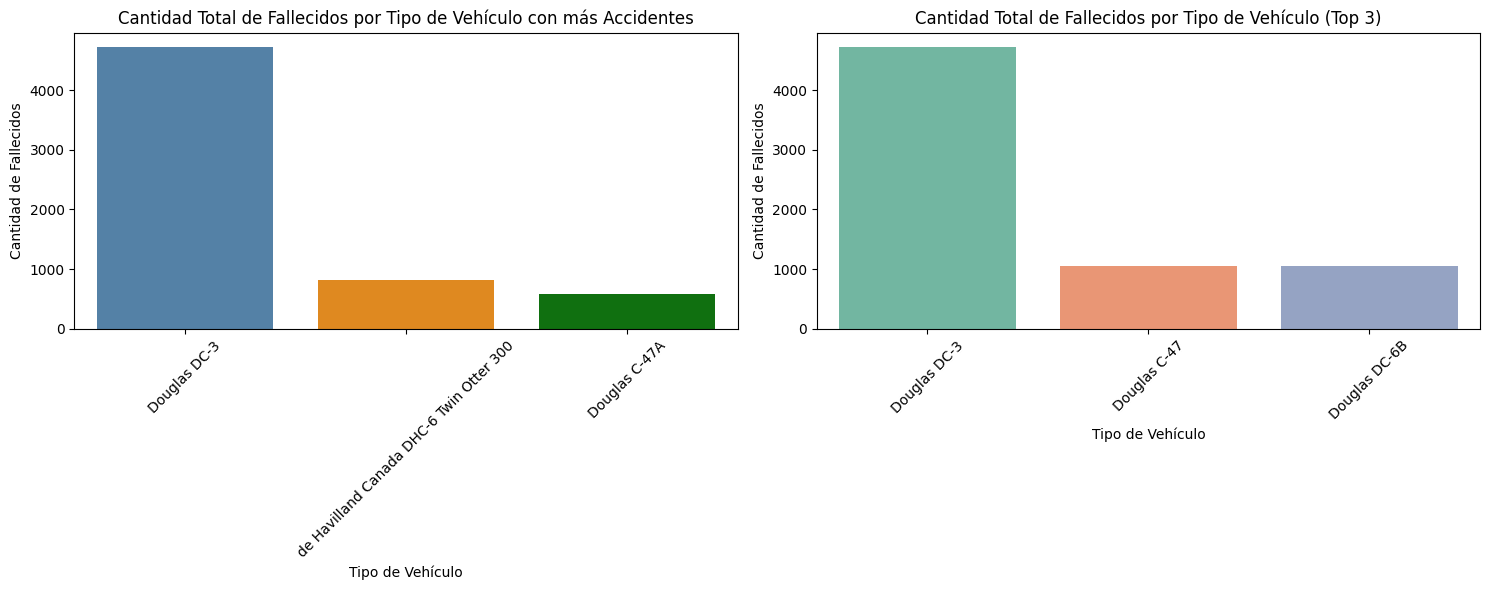

In [ ]:
# Define los tipos de vehículos que deseas mostrar y los colores correspondientes
tipos_vehiculos = ['Douglas DC-3', 'de Havilland Canada DHC-6 Twin Otter 300', 'Douglas C-47A']
colores = {'Douglas DC-3': 'steelblue', 'de Havilland Canada DHC-6 Twin Otter 300': 'darkorange', 'Douglas C-47A': 'green'}

# Filtra los datos para los tipos de vehículo seleccionados
filtered_data = AccidentesAviones[AccidentesAviones['tipo_vehiculo'].isin(tipos_vehiculos)]

# Agrupa por tipo de vehículo y calcula la suma de cantidad_fallecidos
grouped_data = filtered_data.groupby('tipo_vehiculo')['cantidad_fallecidos'].sum().reset_index()

# Ordena la tabla por la cantidad de fallecidos de mayor a menor
grouped_data = grouped_data.sort_values(by='cantidad_fallecidos', ascending=False)

# Crear el primer gráfico de barras
plt.figure(figsize=(15, 6))

plt.subplot(121)  # Subgráfico izquierdo
# Utiliza la paleta de colores personalizada
custom_palette = [colores.get(tipo, 'gray') for tipo in grouped_data['tipo_vehiculo']]
ax = sns.barplot(x='tipo_vehiculo', y='cantidad_fallecidos', data=grouped_data, palette=custom_palette)
plt.title('Cantidad Total de Fallecidos por Tipo de Vehículo con más Accidentes')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje X

# Filtrar los tres primeros tipos de vehículos con más cantidad_fallecidos
top_vehiculos = AccidentesAviones.groupby('tipo_vehiculo')['cantidad_fallecidos'].sum().nlargest(3).index
filtered_data = AccidentesAviones[AccidentesAviones['tipo_vehiculo'].isin(top_vehiculos)]

# Calcular la cantidad total de fallecidos por tipo de vehículo
total_fallecidos_por_tipo = filtered_data.groupby('tipo_vehiculo')['cantidad_fallecidos'].sum().reset_index()

# Ordenar los tipos de vehículos por la cantidad total de fallecidos de mayor a menor
total_fallecidos_por_tipo = total_fallecidos_por_tipo.sort_values(by='cantidad_fallecidos', ascending=False)

# Crear el segundo gráfico de barras
plt.subplot(122)  # Subgráfico derecho
sns.barplot(x='tipo_vehiculo', y='cantidad_fallecidos', data=total_fallecidos_por_tipo, palette='Set2')
plt.title('Cantidad Total de Fallecidos por Tipo de Vehículo (Top 3)')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje X

plt.tight_layout()  # Ajustar la disposición de los subgráficos

plt.show()

Al comparar la cantidad de accidentes con el número de fallecidos
* Se hace evidente que la cantidad de accidentes no necesariamente se correlaciona con el número de víctimas fatales. Esta discrepancia puede deberse al uso particular de cada tipo de vehículo aéreo y a la cantidad de pasajeros que transportaban.

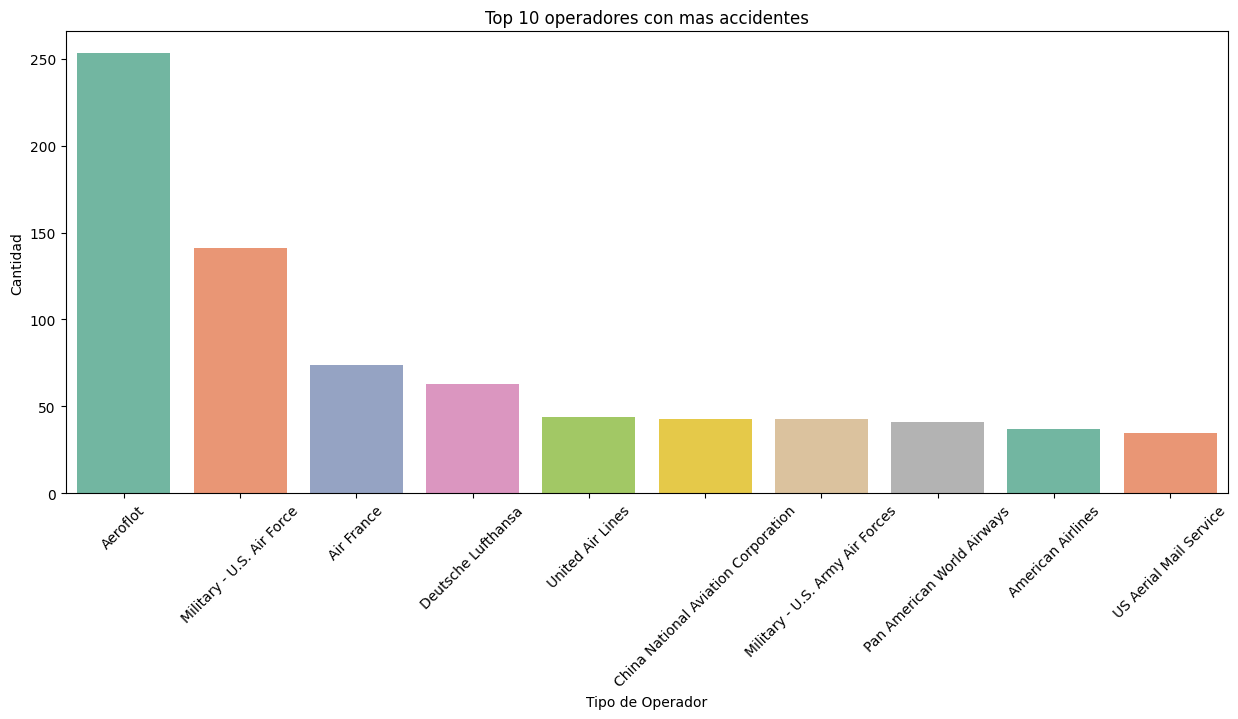

In [ ]:
# Obtener los 10 vehículos que más aparecen excluyendo NaN
top_10_operador = AccidentesAviones['operador'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_10_operador.index, y=top_10_operador.values, palette="Set2")
ax.set_title('Top 10 operadores con mas accidentes')
ax.set_xlabel('Tipo de Operador')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=45)

plt.show()

En la comparación de la cantidad de accidentes por tipo de vuelo, se destaca que
* Los operadores con mayor número de accidentes son aquellos asociados a la empresa Aeroflot. Esto puede atribuirse al amplio uso internacional de las aeronaves de esta empresa, lo que aumenta la exposición al riesgo de accidentes en diversas regiones y rutas.
* En segundo lugar, la Fuerza Aérea de Estados Unidos se presenta como consecutiva en términos de accidentes. Este hecho podría deberse a la constante actividad operativa de la Fuerza Aérea de los Estados Unidos, que mantiene aviones en uso permanente para diversas misiones.
* Finalmente, el tipo de operador Air France, que se utiliza en una variedad de tareas y conecta varios continentes entre sí, también muestra una cantidad significativa de accidentes. Esta diversidad de operaciones y rutas puede influir en la variabilidad en la incidencia de accidentes.

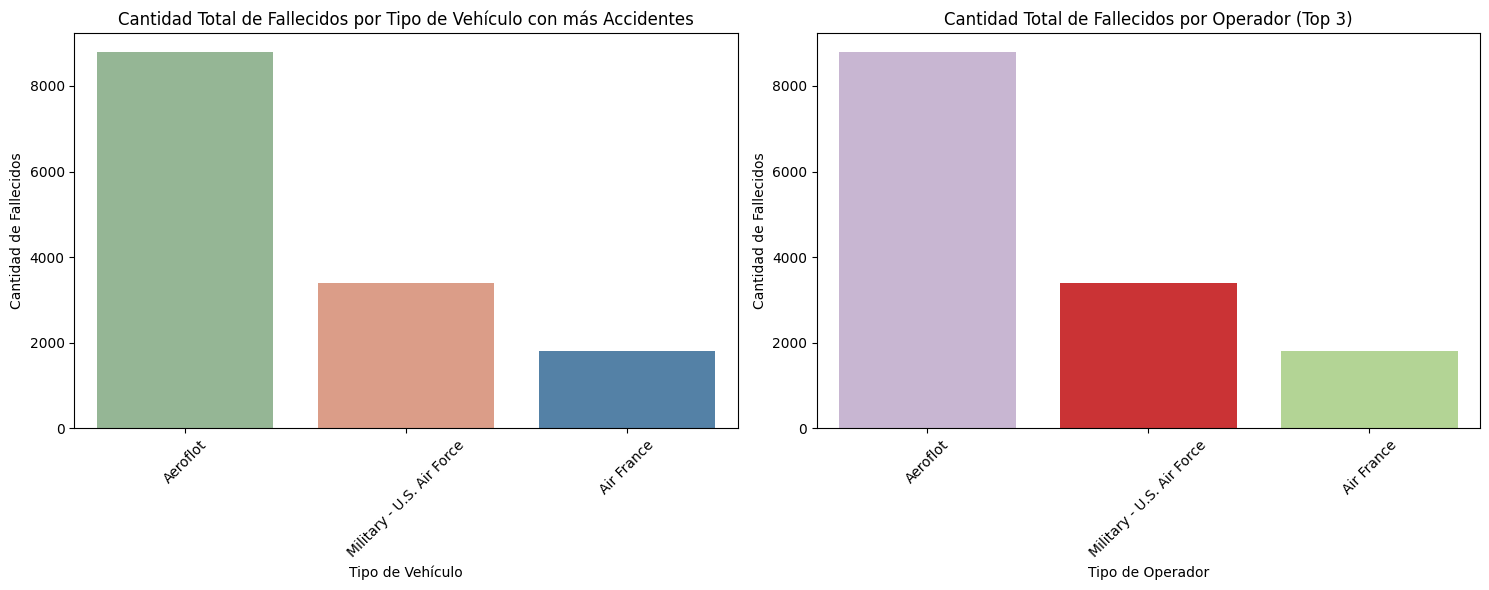

In [ ]:
# Define los tipos de vehículos que deseas mostrar y los colores correspondientes
tipos_vehiculos = ['Aeroflot', 'Military - U.S. Air Force', 'Air France']
colores = {'Aeroflot': 'darkseagreen', 'Military - U.S. Air Force': 'darksalmon', 'Air France': 'steelblue'}

# Filtra los datos para los tipos de vehículo seleccionados
filtered_data = AccidentesAviones[AccidentesAviones['operador'].isin(tipos_vehiculos)]

# Agrupa por tipo de vehículo y calcula la suma de cantidad_fallecidos
grouped_data = filtered_data.groupby('operador')['cantidad_fallecidos'].sum().reset_index()

# Ordena la tabla por la cantidad de fallecidos de mayor a menor
grouped_data = grouped_data.sort_values(by='cantidad_fallecidos', ascending=False)

# Crear el primer gráfico de barras
plt.figure(figsize=(15, 6))

plt.subplot(121)  # Subgráfico izquierdo
# Utiliza la paleta de colores personalizada
custom_palette = [colores.get(tipo, 'gray') for tipo in grouped_data['operador']]
ax = sns.barplot(x='operador', y='cantidad_fallecidos', data=grouped_data, palette=custom_palette)
plt.title('Cantidad Total de Fallecidos por Tipo de Vehículo con más Accidentes')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje X

# Filtrar los tres primeros tipos de vehículos con más cantidad_fallecidos
top_vehiculos = AccidentesAviones.groupby('operador')['cantidad_fallecidos'].sum().nlargest(3).index
filtered_data = AccidentesAviones[AccidentesAviones['operador'].isin(top_vehiculos)]

# Calcular la cantidad total de fallecidos por tipo de vehículo
total_fallecidos_por_tipo = filtered_data.groupby('operador')['cantidad_fallecidos'].sum().reset_index()

# Ordenar los tipos de vehículos por la cantidad total de fallecidos de mayor a menor
total_fallecidos_por_tipo = total_fallecidos_por_tipo.sort_values(by='cantidad_fallecidos', ascending=False)

# Crear el segundo gráfico de barras
plt.subplot(122)  # Subgráfico derecho
sns.barplot(x='operador', y='cantidad_fallecidos', data=total_fallecidos_por_tipo, palette='Paired_r')
plt.title('Cantidad Total de Fallecidos por Operador (Top 3)')
plt.xlabel('Tipo de Operador')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje X

plt.tight_layout()  # Ajustar la disposición de los subgráficos

plt.show()

En esta ocasión
* Al comparar la cantidad de fallecidos, se observa que coincide con los tipos de vuelos que experimentaron un mayor número de accidentes. Esto sugiere que los accidentes en estos tipos de vuelos han tenido un impacto significativo en términos de pérdida de vidas.

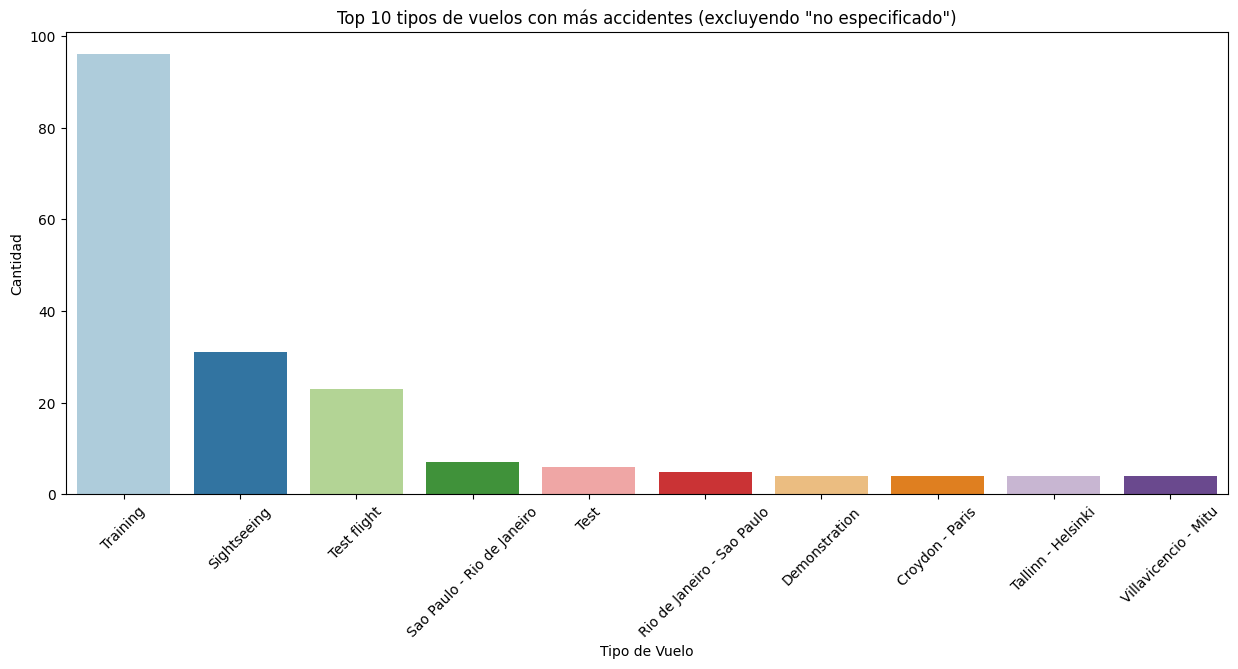

In [ ]:
# Obtener el top 10 de tipos de vuelos excluyendo 'no especificado'
top_10_tipo_vuelo = AccidentesAviones[AccidentesAviones['tipo_vuelo'] != 'No especificado']['tipo_vuelo'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_10_tipo_vuelo.index, y=top_10_tipo_vuelo.values, palette="Paired")
ax.set_title('Top 10 tipos de vuelos con más accidentes (excluyendo "no especificado")')
ax.set_xlabel('Tipo de Vuelo')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=45)

plt.show()

Al observar los datos, se hace evidente que los tipos de vuelo con la mayor cantidad de accidentes corresponden a aquellos destinados a entrenamiento, paseos turísticos (sightseeing) y vuelos de prueba. Esto se debe al riesgo inherente asociado a cada uno de estos tipos de vuelo.
* Los vuelos de entrenamiento suelen involucrar a pilotos con menos experiencia, lo que aumenta la probabilidad de accidentes.
* Los vuelos de sightseeing, destinados a brindar a los pasajeros una vista panorámica, también pueden ser más riesgosos debido a maniobras cercanas al terreno.
* Por último, los vuelos de prueba, que involucran nuevas aeronaves o instrumentación, conllevan un mayor riesgo de incidentes debido a la adaptación y familiarización con nuevas tecnologías.

### ***Conclusiones***
* Este analisis resalta la relevancia de considerar el historial y las operaciones específicas de las empresas aéreas al evaluar la seguridad en la aviación. La diversidad de actividades puede influir en la cantidad de accidentes registrados, y esto subraya la importancia de un análisis detallado para identificar áreas de mejora en términos de seguridad.
* Estos datos proporcionan una visión más profunda de cómo la historia y el propósito de cada tipo de aeronave pueden influir en la incidencia de accidentes aéreos a lo largo del tiempo.
* Es importante destacar que la gravedad de un accidente aéreo no solo depende del hecho de que haya ocurrido, sino también de factores como la capacidad de la aeronave y la cantidad de personas a bordo.
* Es importante destacar que las características particulares de cada tipo de vuelo, incluyendo la experiencia del personal y la naturaleza de las operaciones, influyen en la cantidad de accidentes registrados. Estos hallazgos resaltan la necesidad de considerar el contexto operativo al analizar la seguridad en la aviación.

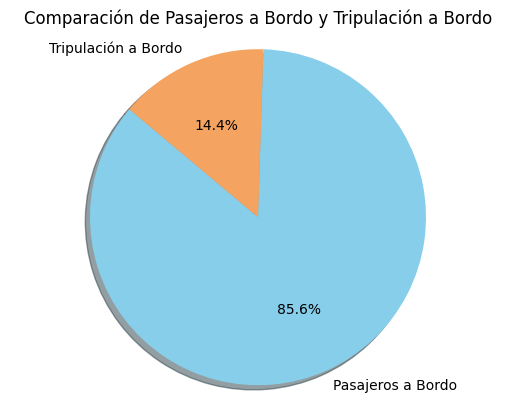

In [ ]:
# Sumar la cantidad de pasajeros fallecidos y tripulación fallecida
pasajeros_a_bordo = AccidentesAviones['pasajeros_a_bordo'].sum()
tripulacion_a_bordo = AccidentesAviones['tripulacion_a_bordo'].sum()

# Crear un gráfico de torta
labels = 'Pasajeros a Bordo', 'Tripulación a Bordo'
sizes = [pasajeros_a_bordo, tripulacion_a_bordo]
colors = ['skyblue', 'sandybrown']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio garantiza que la torta sea circular.

plt.title('Comparación de Pasajeros a Bordo y Tripulación a Bordo')

plt.show()

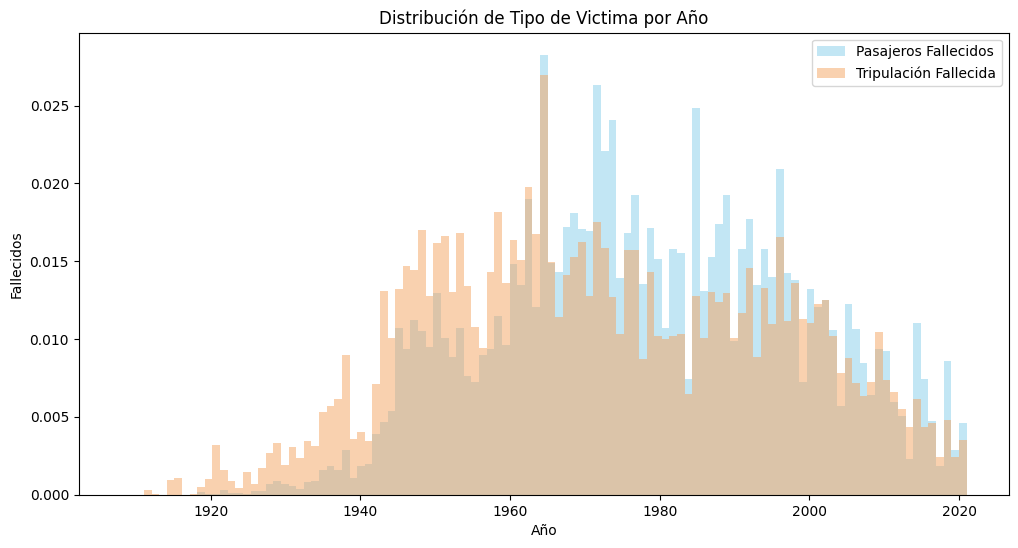

In [ ]:
# Agrupar por año y sumar la cantidad de pasajeros fallecidos por año
total_pasajeros_fallecidos = AccidentesAviones.groupby(AccidentesAviones['fecha'].dt.year)['pasajeros_fallecidos'].sum()

# Agrupar por año y sumar la cantidad de tripulacion fallecidos por año
total_tripulacion_fallecida = AccidentesAviones.groupby(AccidentesAviones['fecha'].dt.year)['tripulacion_fallecida'].sum()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(total_pasajeros_fallecidos.index, bins=len(total_pasajeros_fallecidos), weights=total_pasajeros_fallecidos.values, alpha=0.5, color='skyblue', label='Pasajeros Fallecidos', density=True)
plt.hist(total_tripulacion_fallecida.index, bins=len(total_tripulacion_fallecida), weights=total_tripulacion_fallecida.values, alpha=0.5, color='sandybrown', label='Tripulación Fallecida', density=True)
plt.title('Distribución de Tipo de Victima por Año')
plt.xlabel('Año')
plt.ylabel('Fallecidos')
plt.legend()
plt.show()

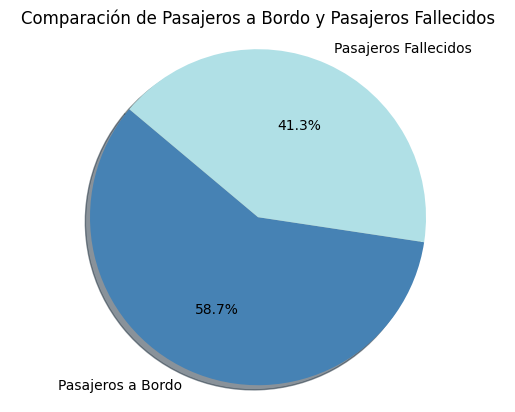

In [ ]:
# Sumar la cantidad de pasajeros fallecidos y tripulación fallecida
total_pasajeros_a_bordo = AccidentesAviones['pasajeros_a_bordo'].sum()
total_pasajeros_fallecidos = AccidentesAviones['pasajeros_fallecidos'].sum()

# Crear un gráfico de torta
labels = 'Pasajeros a Bordo', 'Pasajeros Fallecidos'
sizes = [total_pasajeros_a_bordo, total_pasajeros_fallecidos]
colors = ['steelblue', 'powderblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio garantiza que la torta sea circular.

plt.title('Comparación de Pasajeros a Bordo y Pasajeros Fallecidos')

plt.show()

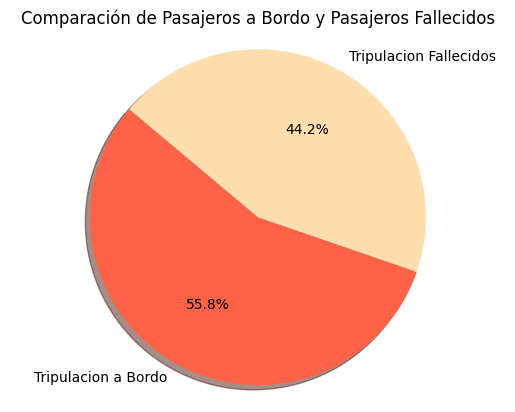

In [ ]:
# Sumar la cantidad de pasajeros fallecidos y tripulación fallecida
total_tripulacion_a_bordo = AccidentesAviones['tripulacion_a_bordo'].sum()
total_tripulacion_fallecidos = AccidentesAviones['tripulacion_fallecida'].sum()

# Crear un gráfico de torta
labels = 'Tripulacion a Bordo', 'Tripulacion Fallecidos'
sizes = [total_tripulacion_a_bordo, total_tripulacion_fallecidos]
colors = ['tomato', 'navajowhite']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio garantiza que la torta sea circular.

plt.title('Comparación de Pasajeros a Bordo y Pasajeros Fallecidos')

plt.show()

In [180]:
# Guarda el DataFrame users_reviews en un archivo csv
AccidentesAviones.to_csv(os.path.join('datasets/', 'AccidentesAvionesEDA.csv'), index=False)